Group Name: AG 13.

Student Name (Student ID):

1. Zhao Yufan (A0255971U)

2. Nayanthara Prathap Menon (A0261939R)

3. Valeriy Ivanov (A0228607B)

# Question 2

## Introduction to question 2

In the second question of this assignment, we will explore the use of local search in genome assembly.

We will use local search to assemble (construct) a large part of the nucleotide sequence of the monkeypox virus, which has been downloaded from the National Center for Biotechnology Information in the United States. Please note that no additional or specialized knowledge of biology or bioinformatics is required for this assignment. (Actually, the technical specifics of bioinformatics have been adapted and simplified for the purposes of this computer science assignment, so if you are a biologist, please do not apply preexisting knowledge to solve the problem. Furthermore, you should not attempt to search up the genome on genomic databases to "guess" the actual sequence, since we are more interested in your coding methodology rather than your attempts at reproducing a known sequence.)

This is an introductory computer science assignment and not a bioinformatics assignment; we are simply using bioinformatics as a use case to illustrate the applicability of local search to the natural sciences. Therefore, no knowledge of bioinformatics is assumed or required. In the paragraphs that follow, I will give a short crash course which will cover all the domain knowledge you will need to know in order to tackle this problem.  

For technical reasons, when we analyze the nucleotide sequence (genome) of a virus, we usually cannot “read” it in one fell swoop. We have to read the genome in parts, because the genome is usually too long for the machine to read in a single sitting. To simplify things, a “read” is a single view of part of the genome; think of it as a SUBSTRING, a partial view of the whole genome. After we have generated multiple reads of a genome, we then have to “stitch”, or combine, the different reads of the genome together. This process of stitching up reads of a genome into the final sequence is known as genome assembly. However, the different reads of the genome cannot just be concatenated like usual string concatenation. It’s not a situation where you have one read, “Hello”, and another read, “World”, and all you need to do is concatenate both strings together to make “Hello World”. Among other reasons, there are two major reasons why you can’t do so:

1. You do not know which read came first. The reads are not ordered. How do you know “Hello” came after “World”? The answer is that you don’t. Imagine how complicated this situation might be if you had more than two reads. (This is indeed our situation, where we have $n$ reads, and $n>>2$.)

2. One read may contain a substring contained in another read. Specifically, without loss of generality, part of the ending $x$ characters of a read (i.e., suffix) might also be found in the starting $x$ positions (i.e., prefix) of another read.

- A computer scientist usually creates opportunities from problems. While this may be a “problem” in that you just can’t concatenate two strings blindly, the fact that strings contain shared “substrings” is actually a very helpful clue that you can use to “join” strings together. 

- Note that the choice of the value of $x$ could be a hyperparameter decided by the computer scientist.

## Your tasks

In this part of the assignment, you will work with (simulated) reads that I have generated from the nucleotide sequence of the monkeypox virus. In reality, bioinformatics is far more complicated, but here we will work with a simplified situation. Your task is to examine the reads that I have provided for you, and from there “infer” the nucleotide sequence that might have produced those reads. 

The reads are provided in the csv file `data.csv` which simply provides a list of unique strings. Note that you should NOT assume any particular ordering of the strings in this dataframe. In fact, the strings have already been shuffled randomly. 

NOTE: You are not allowed to use `pandas` or any other libraries apart from the Python STL to load the csv file.

### Task A (3 marks): 

Create a directed graph. The nodes in the graph are the strings in the list of reads. An edge should be drawn FROM read A TO read B if and only if a suffix (of length $x$) of read A is also a prefix (obviously, also of length $x$) of read B. For the purposes of the assignment, limit the value of $x$ to between 5 and 30, both inclusive. That is, to be clear, $5\leq x\leq 30$. The weight of an edge between read A and read B should be the NEGATED value of $x$, i.e. $-x$. 

In your Jupyter notebook, please report the number of edges in your graph. Provide a barplot or histogram which shows the number of edges with different weights or weight categories. In this task, you are free to use plotting libraries such as `matplotlib` or `seaborn` to plot this graph.

As an example, if read A is "TACTAGT" and read B is "TAGTCCCCT", then an edge is drawn FROM read A TO read B (i.e., $A \rightarrow B$) with weight of $-4$. This is because the 4-suffix "TAGT" is also the 4-prefix of read B; in other words, the last 4 characters of read A (a substring of length 4) overlap with the first 4 characters of read B (a substring of length 4).

### Task B (7 marks): 

From Task A, you now have a graph which shows connections between reads based on how they overlap, in theory you could draw a path through the graph and thereby derive the full sequence (genome).

Task B asks you to use local search method(s) to determine a path through this directed graph of strings. 

- You are expected to use simulated annealing and tune the relevant configuration settings and hyperparameters. The minimum requirement is to implement simulated annealing.

- Explain tha rationale behind the choice of scheduling strategy and parameters.

- However, you may also explore other search methods in addition to simulated annealing. Marks will be awarded for effort.

Note the following constraints:

1. The path has to go through each and every vertex exactly once. For computer scientists, this constraint is reminiscent of the "Traveling Salesman's Problem", except that unlike TSP, we should not need to go back to the starting vertex again. 

2. For the purposes of neighbor generation / action selection at each node, bear in mind that a path through the graph which minimizes the total number of nucleotides in the assembled sequence is the preferred path. To state that another way, the assembled sequence should be derived from a path that goes through EACH and EVERY vertex exactly once, however we want this assembled sequence to be AS SHORT AS POSSIBLE.

3. You are not given the starting (source/origin) or ending (destination) vertex.

4. For avoidance of ambiguity, no cycles are allowed. You must not visit a vertex more than once.

5. You are not allowed to use any libraries apart from the Python Standard Library.
No import statements which import libraries outside of the Python STL should be found within your answer for Task B.

Please remember to report the assembled sequence that you obtain. Although it would be great if you can come up with a good sequence, please feel reassured that we are more interested in your APPROACH to the problem, and so you can potentially get a reasonable score on this task even if your solution is "wrong". It is the process, rather than the result, which matters more.

$\textbf{Task A}$:

1. We have a biological virus with a really really long DNA, that is too long to read from beginning to end.
2. We have read short portions of it multiple times, and we hope to piece them together.
3. The short reads are given in the data.csv file.
4. Suppose we have 2 reads X and Y. If the characters towards the end of read X matches those at the beginning of read Y, there is a good chance that the X and Y were together in the original DNA.

$\textbf{Toy Example}$:
rawData2 =  [['0' , 'read_0' , 'TCGATCTG'] , ['1' , 'read_1' , 'TCTGA'] , ['2' , 'read_2' , 'TGAGA'] , ['3' , 'read_3' , 'ATCGA']]

A possible DNA would be ATCGATCTGAGA, where we joined (read_3) - (read_0) - (read_1) - (read_2) , because there is substantial overlap between each read. The bigger the overlap, the better.

$\textbf{What we need to do for this question}$:

Repeat the toy example, but for rawData = data.csv

I have written some helper functions that I think will be useful:


$\textbf{SufPreCompare(string1 = '' , string2 = '')}$ does the following:
    Given 2 strings string1 and string2, returns a tuple (a,b), where:
        a is the length of overlap of suffix of string 1 and prefix of string 2
        b is the length of overlap of suffix of string 2 and prefix of string 1

In [1]:
def SufPreCompare(string1 = '' , string2 = ''):
    
    def StrCompare(string1, string2):
        maxindex = min(len(string1) , len(string2),30)

            
        counter = maxindex
        
        while counter > 0:
            
            str1 = string1[len(string1) - counter : ]
            str2 = string2[0 : counter]
            
            if str1 == str2:
                return counter
            else:
                counter = counter - 1
        return counter
    
    a = StrCompare(string1, string2)
    b = StrCompare(string2, string1)
    return (a,b)

In [2]:
SufPreCompare(string1 = 'TCGATCTG' , string2 = 'TCTGA')

(4, 0)

Explanation: The last 4 letters of string1 matches the first 4 letters of string2. The last 0 letters of string2 matches the first 0 letters of string1.

In [3]:
SufPreCompare(string1 = 'TCGATCTG' , string2 = 'TCTGATCGAT')

(4, 5)

Explanation: The last 4 letters of string1 matches the first 4 letters of string2. The last 5 letters of string2 matches the first 5 letters of string1.

$\textbf{read_line_by_lineRaw(filename = '')}$ does the following:
    Open up a file stored in your computed called (filename), and returns its contents as a list. It is intended to be used on data.csv
    
The last line rawData.pop(0) removes the header. The output is the row that was removed from our data.

In [4]:
#read_line_by_lineRaw takes a csv file and returns its rows as a list    
def read_line_by_lineRaw(filename = ''):
    output = []
    with open(filename) as f:
        for line in f:
            b = line.rstrip('\n')
            a = b.split(',')
            output.append(a)
    return output

$\textbf{You need to upload the data.csv file to the jupyter notebook environment for the next cell to work:}$

In [5]:
#rawData is a list of reads, with each row being:
#   ['row_count' , 'read_count' , 'read_string']
rawData = read_line_by_lineRaw('data.csv')

#remove the header row
rawData.pop(0)

['', 'read_index', 'read_sequence']

 There is a possibility that a particular read X gives a substring of another read Y
 We eliminate this possibility by doing the following:
    
1. Compare every possible pair of reads.
2. If one of them is a substring of the other, change read to 'x'.
3. Write a file ProcessedData.txt with 'x' reads intact.
4. Write another file ProcessedData2.txt  with 'x' reads removed.
    
After manually comparing the number of lines in ProcessedData.txt and ProcessedData2.txt, we realise that
None of the reads are sub-reads of another read.
So we can use rawData as it is. The code below does the above.
Since this is a one-time check, the manual check above is fine.

In [6]:
for i in range(len(rawData)):
    for j in [x for x in range(len(rawData)) if x != i]:
        if rawData[i][2] in rawData[j][2]:
            rawData[i] = [rawData[i][0] , rawData[i][1] , 'x']

with open('ProcessedData.txt' , 'w') as g:
    for i in range(len(rawData)):
        if rawData[2] != 'x':
            g.write(f'{rawData[i][0]},{rawData[i][1]},{rawData[i][2]}\n')
        else:
            continue

with open('ProcessedData2.txt' , 'w') as g:
    for i in range(len(rawData)):
        g.write(f'{rawData[i][0]},{rawData[i][1]},{rawData[i][2]}\n')

Next, we want to produce a directed graph with the following as vertices and directed edge labels:
1. Vertices are the reads
2. Given 2 vertices A and B, the edge from A to B has edge label  -(length of overlap of end of A and beginning of B) 

$\textbf{graphEdgeConstructor(m , n , dataset)}$ does the following: 
Given two reads m and n in a dataset (which should be the list returned by read_line_by_lineRaw(filename = ''), not the original file data.csv), returns a tuple of tuples ((m,n) , (x,y)), where:
1. x is the overlap between the end of read m and beginning of read n
2. y is the overlap between the end of read n and beginning of read m

$\textbf{contructEdges(dataset)}$ does the following:
1. Scan through the entire dataset.
2. For pairs of reads (m,n) with non-zero overlaps (x,y) as defined above in graphEdgeConstructor(m , n , dataset), put all of them into a list.

In [7]:
def graphEdgeConstructor(m , n , dataset):
    comparison = SufPreCompare(dataset[m][2] , dataset[n][2])
    return ((m,n) , comparison)

def constructEdges(dataset):
    output = []
    test4 = len(dataset)
    for i in range(test4):
        for j in range(i+1,test4):
            temp = graphEdgeConstructor(i , j, dataset)
            #if temp[1] != (0,0):
            if temp[1][0] > 0 or temp[1][1] > 0:
                output.append(temp)

    return output

We test these functions on the Toy Example:

In [8]:
rawData2 = [['0','read_0','TCGATCTG'],['1','read_1','TCTGA'],['2','read_2','TGAGA'],['3','read_3','ATCGA']]
rawDataMini = rawData[0:300]
#rawDataMini is the first 300 rows of data.csv in list format

constructEdges(rawData2)

[((0, 1), (4, 0)),
 ((0, 2), (2, 0)),
 ((0, 3), (0, 4)),
 ((1, 2), (3, 0)),
 ((1, 3), (1, 0)),
 ((2, 3), (1, 0))]

$\textbf{Explanation}:$ We see that the biggest numbers that appear on the right column of tuple are 4, 4, and 3 in rows 0, 2, and 3. This suggests the following 'joining-up' of our DNA sequence:

1. row 0: This means there are 4 overlapping letters at the end of read_0 and beginning of read_1
2. row 2: This means there are 4 overlapping letters at the end of read_3 and beginning of read_0
3. row 3: This means there are 3 overlapping letters at the end of read_1 and beginning of read_2

This suggests our DNA should be (read_3) - (read_0) - (read_1) - (read_2). Hence:

DNA = 'ATCGATCTGAGA'

$\textbf{constructEdges2(dataset)}$ does the samething as constructEdges(dataset), except that it only returns pairs where the overlap is from 5 to 30 characters:

In [9]:
def constructEdges2(dataset):
    output = []
    test4 = len(dataset)
    for i in range(test4):
        for j in range(i+1,test4):
            temp = graphEdgeConstructor(i , j, dataset)
            #if temp[1] != (0,0):
            if (temp[1][0] > 4 or temp[1][1] > 4) and temp[1][0]<31 and temp[1][1]<31:
                output.append(temp)

    return output

We now create a graph class, and our specific graph is dnaProblem. We use the adjacency matrix representation of a graph:

In [10]:
class Graph:
    def __init__(self, num_of_nodes, directed=True):
        self.m_num_of_nodes = num_of_nodes
        self.m_directed = directed

        # Initialize the adjacency matrix
        # Create a matrix with `num_of_nodes` rows and columns
        self.m_adj_matrix = [[0 for column in range(num_of_nodes)] 
                            for row in range(num_of_nodes)]

    def add_edge(self, node1, node2, weight=1):
        self.m_adj_matrix[node1][node2] = weight

        if not self.m_directed:
            self.m_adj_matrix[node2][node1] = weight

    def print_adj_matrix(self):
        print(self.m_adj_matrix)

In [11]:
edges = constructEdges2(rawData)
    
dnaProblem = Graph(599, directed = True)

for i in range(len(edges)):
    consider = edges[i]
    dnaProblem.add_edge(consider[0][0] , consider[0][1] , weight = -consider[1][0])
    dnaProblem.add_edge(consider[0][1] , consider[0][0] , weight = -consider[1][1])
    
for i in range(len(dnaProblem.m_adj_matrix)):
    for j in range(len(dnaProblem.m_adj_matrix)):
        if dnaProblem.m_adj_matrix[i][j] > -5:
            dnaProblem.m_adj_matrix[i][j] = 0

We now plot a bar chart, with horizontal axis being weights and vertical axis being the number of edges:

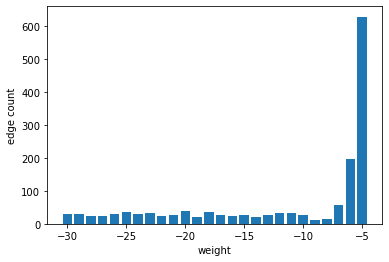

In [12]:
import matplotlib.pyplot as plt

weights = list(range(-30,-4))
finalcounts = []

for i in range(-30,-4):
    count = 0
    for j in range(599):
        for k in range(599):
            if dnaProblem.m_adj_matrix[j][k] == i:
                count = count+1
    finalcounts.append(count)
    
plt.bar(weights,finalcounts)
plt.xlabel('weight')
plt.ylabel('edge count')
plt.show()


$\textbf{Task B}$：We now implement our task as a Travelling salesman problem, with the "map graph" being the adjacency matrix found above.

In [13]:
import math
import sys
import random
import numpy.random

In [14]:
class TSP:
    def __init__(self , graph : Graph , initial : list):
        
        #self.state is the path we are taking through self.graph
        self.graph = graph
        self.state = initial
        self.temp = initial

    
    def actions(self, state : list):
        actions = ['Reverse' , 'Transport']
        return actions
    
    
    
    def result(self, state : list, action):
        
        def listReverse(L , a , b):

            beginning = L[0:a]
            middle = L[a:b]
            end = L[b:]
            middle.reverse()
            return beginning + middle + end
        
        def listTransport(L, a , b , c):

            beginning = L[0:a]
            middle = L[a:b]
            end = L[b:]
            intermediate = beginning + end
            intS1 = intermediate[0:c]
            intS2 = intermediate[c:]
            return intS1 + middle + intS2
        
        if action == 'Reverse':
            x = random.randint(0 , len(self.state))
            y = random.randint(0 , len(self.state))
            a = min(x,y)
            b = max(x,y) + 1
            return listReverse(self.state , a , b)
        
        if action == 'Transport':
            x = random.randint(0 , len(self.state)-1)
            y = random.randint(x , len(self.state))

            c = random.randint(0 , len(self.state) - (y-x) + 1)
            return listTransport(self.state , x , y , c)
        
        
        
    def cost(self, path):
        vertices = len(self.graph.m_adj_matrix)-1
        maxvertex = 0
        for i in path:
            if i > maxvertex:
                maxvertex = i
                              
        if maxvertex > vertices:
            raise ValueError('Path tries to visit a vertex not in graph')
        else:
            path_cost = 0
            positionInPath = path[0]
            for i in path[1:]:
                path_cost = path_cost + self.graph.m_adj_matrix[positionInPath][i]
                positionInPath = i
        return path_cost

We use the simulated annealing algorithm to solve the Travelling Salesman Problem. We first define a cooling schedule, then we implement the algorithm:

In [24]:
def exp_schedule(k=10000, lam=0.005, limit=sys.maxsize):
    """One possible schedule function for simulated annealing"""
    return lambda t: (k * math.exp(-lam * t) if t < limit else 0)

In [25]:
m = 10000
decay = 0.0005
maxiterations = 100000
def simulated_annealing(problem, schedule=exp_schedule(k = m , lam = decay , limit = maxiterations)):
    
    for t in range(50000):
        T = schedule(t)
        if T == 0:
            return problem.state
        action = random.choice(['Reverse' , 'Transport'])
        problem.temp = problem.result(problem.state , action)
        

        delta_e = problem.cost(problem.state) - problem.cost(problem.temp)
        if delta_e > 0 or numpy.random.binomial(1, (schedule(t)/ ((1.02)*m) ) ) == 1:
            problem.state = problem.temp
    return problem.state

In [31]:
initialPath = list(range(599))
dnaTSP = TSP(dnaProblem , initialPath)

solution = simulated_annealing(dnaTSP, schedule=exp_schedule())
print(solution)


[0, 1, 358, 222, 243, 209, 108, 109, 110, 5, 327, 495, 208, 506, 174, 383, 382, 191, 432, 563, 564, 323, 284, 534, 527, 290, 291, 26, 34, 35, 333, 53, 365, 112, 171, 588, 153, 501, 419, 144, 567, 31, 30, 360, 37, 339, 353, 168, 351, 308, 573, 154, 372, 568, 177, 457, 577, 405, 273, 566, 420, 459, 384, 237, 350, 590, 507, 142, 401, 476, 475, 474, 316, 238, 597, 82, 155, 313, 366, 227, 363, 547, 472, 540, 276, 481, 557, 63, 299, 91, 489, 574, 575, 123, 551, 537, 431, 71, 558, 337, 571, 486, 95, 96, 97, 98, 274, 272, 100, 157, 74, 116, 460, 216, 92, 151, 585, 182, 38, 195, 517, 439, 22, 294, 295, 464, 417, 524, 511, 249, 440, 441, 498, 23, 232, 58, 598, 318, 21, 20, 166, 10, 9, 331, 416, 421, 252, 388, 315, 317, 247, 559, 560, 241, 179, 178, 296, 470, 407, 376, 239, 380, 152, 67, 163, 162, 161, 230, 390, 452, 309, 343, 594, 595, 494, 70, 596, 68, 403, 404, 463, 381, 28, 27, 584, 311, 119, 120, 214, 386, 332, 342, 310, 576, 146, 145, 189, 173, 565, 203, 322, 349, 586, 587, 433, 114, 234, 4

In [32]:
print(dnaTSP.cost(solution))

-2630


The algorithm works as follows. We first initialise with a fixed path that transverse the graph from vertex 0 to 599 in order. We represent this path by a list $[0,1,2,...,598,599]$. We then define two moves: Reverse(a,b) and Transport(a,b,c). The moves do the following:

1. Reverse(a,b) reverses the portion of the list between index a and b. More precisely, it takes the list $[0,1,2,...,598,599]$, slices it up into 3 portions $[0,1,2,...,a]$ , $[a+1, a+2, ..., b-1]$ , $[b, b+1,..., 598, 599]$, reverses the middle portion (so it becomes $[b-1, b-2, ..., a+2, a+1]$, and then concatenate them back together, forming the new list $[0,1,2,...,b-1,b-2,..., a+2, a+1, b, b+1, ..., 598, 599]$. 

2. Transport(a,b,c) moves a portion of the list between index a and b into a new position c. More precisely it takes the list $[0,1,2,...,598,599]$, slice it up into 3 portions, $[0,1,2,...,a]$ , $[a+1, a+2, ..., b-1]$ , $[b, b+1,..., 598, 599]$, concatenate the first and last portion into $[0,1,2,...,a ,b, b+1,..., 598, 599]$. It then selects an index c in this new list, and insert the middle portion $[a+1, a+2, ..., b-1]$ at this position. So the new list becomes $[0,1,...c,a+1,a+2,...,b-1, c+1, ...598,599]$.


These 2 operations will generate all possible permutations of vertices that we transverse the path. In fact, the reverse operation alone is enough. (A result in group theory in mathematics says that the set of all transpositions generate the symmetric group on n elements). But this is too slow and some permutations may be unreachable in a reasonable number of iterations, so we allow for more flexibility ( by choosing $a$ and $b$ independently, and also introducing the 'Transport' move.)

Starting with an initial path, a random move (either 'Reverse' or 'Transport') is chosen, and its parameters are again chosen randomly (with two restrictions: $a < b$ for both 'Reverse' and 'Transport' so that the slicing makes sense, and $c$ is a valid index for 'Transport'). The cost of transversing the new path is calculated. If the new cost is better than the original cost, the move is accepted. Otherwise, the move is accepted with probability $p$ as determined by the simulated annealing schedule.

An exponential decay schedule was chosen because we don't want to be stuck on a small local maximum early on in the simulated annealing process. We also don't want to accept a destructive move after many iterations because we are likely near the global minimum at that point.